<h1><center>About Dataset</center></h1>
<h5>62,000 salary records from top companies.This dataset contains useful information such as education level, compensation (base salary, bonus, stock grants), race, and more.</h5>

<h1><center>Objectives</center></h1>

<ul>
    <li>Gender Information on each comanies</li>
    <li>Each job analysis on every company</li>
    <li>Companies payments for each job</li>
    <li>Distribution of job around the cities</li>
    <li>Each job benefits analysis</li>
    <li>Education and job befenits analysis</li>

</ul>

## <center>Setting notebook up</center>

<h3>importing neccessary libraries</h3>

In [43]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
sns.set_palette('crest_r', 30)
print('Importing libraries finished')

Importing libraries finished


<h3>Loading data from csv file</h3>

In [44]:
data = pd.read_csv('Levels_Fyi_Salary_Data.csv')
df = data.copy()
print('Data has been seccuessfully loaded and was coppied to new varriable')

Data has been seccuessfully loaded and was coppied to new varriable


In [45]:
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN


<h2><center>Cleaning Data</center></h2>

In [46]:
df[['company','level','gender','otherdetails', 'Education', 'Race', 'tag']] = df[['company','level','gender','otherdetails', 'Education', 'Race', 'tag']].fillna('unknown')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.dropna(how='all', inplace=True)
print('NaN values have been droped or replaced properly')

NaN values have been droped or replaced properly


In [47]:
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,2017-06-07 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,unknown,107000.0,...,0,0,0,0,0,0,0,0,unknown,unknown
1,2017-06-10 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,unknown,0.0,...,0,0,0,0,0,0,0,0,unknown,unknown
2,2017-06-11 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,unknown,155000.0,...,0,0,0,0,0,0,0,0,unknown,unknown
3,2017-06-17 00:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,unknown,157000.0,...,0,0,0,0,0,0,0,0,unknown,unknown
4,2017-06-20 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,unknown,0.0,...,0,0,0,0,0,0,0,0,unknown,unknown


In [48]:
def find_education_degree(row):
    if row[17] == 1:
        return 'Doctorate_Degree'
    elif row[15] == 1:
        return 'Masters_Degree'
    elif row[16] == 1:
        return 'Bachelors_Degree'
    elif row[19] == 1:
        return 'Some_College'
    elif row[18] == 1:
        return 'Highschool'
    else:
        return 'unknown'    

education = df.apply(find_education_degree, axis='columns')
df['education'] = education
print('Education column was added based on the highest degree of the employee')

Education column was added based on the highest degree of the employee


In [49]:
columns_to_drop = ['Doctorate_Degree','Masters_Degree', 'Bachelors_Degree', 'Some_College', 'Highschool' ]
df.drop(columns_to_drop, axis=1, inplace=True)
df.drop('rowNumber',axis=1, inplace=True)
df.drop(df.columns[16:21], axis=1, inplace=True)
df['gender'] = df['gender'].replace('Title: Senior Software Engineer', 'unknown')
print('Unusable columns were droped')

Unusable columns were droped


In [50]:
def calculate_total_income(row):
    total_sal = max([row['totalyearlycompensation'], row['basesalary']])
    if total_sal == 0:
        return 0
    else:
        return total_sal + row['bonus'] + row['stockgrantvalue']

total_income = df.apply(calculate_total_income, axis=1)
df.insert(12, 'total income', total_income)
print('Total income was calculated and added to the dataset')

Total income was calculated and added to the dataset


In [51]:
df = df.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)
print('White spaces were removed from the dataset')

White spaces were removed from the dataset


In [52]:
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,total income,gender,otherdetails,cityid,dmaid,Race,Education,education
0,2017-06-07 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,unknown,107000.0,20000.0,10000.0,157000.0,unknown,unknown,7392,807.0,unknown,unknown,Bachelors_Degree
1,2017-06-10 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,unknown,0.0,0.0,0.0,100000.0,unknown,unknown,7419,807.0,unknown,unknown,unknown
2,2017-06-11 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,unknown,155000.0,0.0,0.0,310000.0,unknown,unknown,11527,819.0,unknown,unknown,unknown
3,2017-06-17 00:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,unknown,157000.0,180000.0,35000.0,587000.0,unknown,unknown,7472,807.0,unknown,unknown,unknown
4,2017-06-20 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,unknown,0.0,0.0,0.0,157000.0,unknown,unknown,7322,807.0,unknown,unknown,unknown


<h2><center>Kknowled Representation</center></h2>

### Companies and employees counts

In [53]:
company_counts = df['company'].nunique()
employee_counts = df.shape[0]
companies_employee_label = ['Employees','Company']
companies_employee_values = [employee_counts,company_counts]

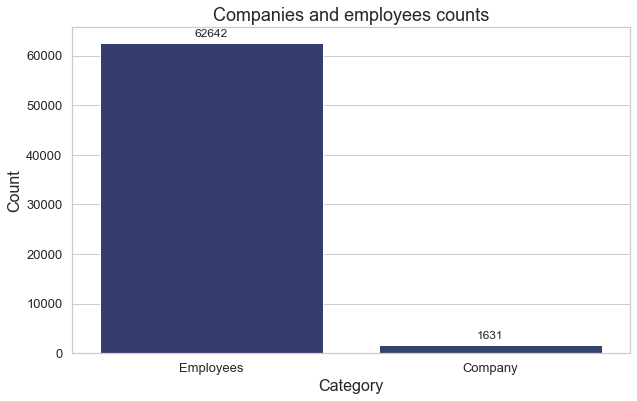

In [54]:
fig, ax = plt.subplots(figsize=(10,6))
splot = sns.barplot(x=companies_employee_label, y=companies_employee_values, ci=None, ax=ax)
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Companies and employees counts', fontsize=18)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel('Category', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

### Companies with most employees

In [55]:
companies_employee_count = df.groupby('company', as_index= False).size().sort_values(by='size', ascending=False)

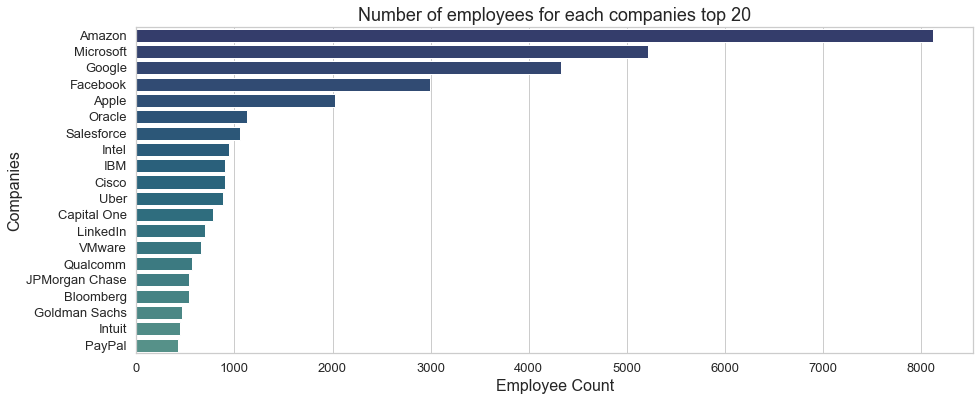

In [56]:
companies_employee_count.iloc[0:20]
plt.figure(figsize=(15,6))
sns.barplot(x=companies_employee_count.iloc[0:20, 1], y=companies_employee_count.iloc[0:20, 0])
plt.title('Number of employees for each companies top 20', fontsize=18)
plt.xlabel('Employee Count', fontsize=16)
plt.ylabel('Companies', fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

# <center>Job titles information</center>

### Employees counts by job title

In [57]:
total_job_with_count = df.groupby('title', as_index=False).size().sort_values('size', ascending=False)

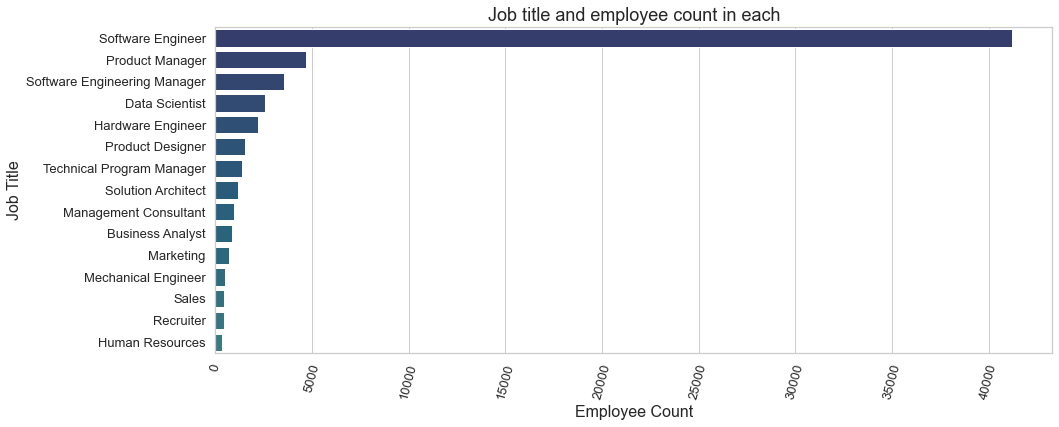

In [58]:
plt.figure(figsize=(15,6))
plt.title('Job title and employee count in each', fontsize=18)
sns.barplot(x=total_job_with_count['size'], y=total_job_with_count['title'])
plt.xticks(rotation=75, fontsize=13)
plt.ylabel('Job Title', fontsize=16)
plt.xlabel('Employee Count', fontsize=16)
plt.yticks(fontsize=13)
plt.show()

### Avg earning for each job

In [59]:
leave_0_out = df['totalyearlycompensation'] != 0
total_income_per_job = df[leave_0_out].groupby('title', as_index=False)['totalyearlycompensation'].mean().sort_values(by='totalyearlycompensation',ascending=False)

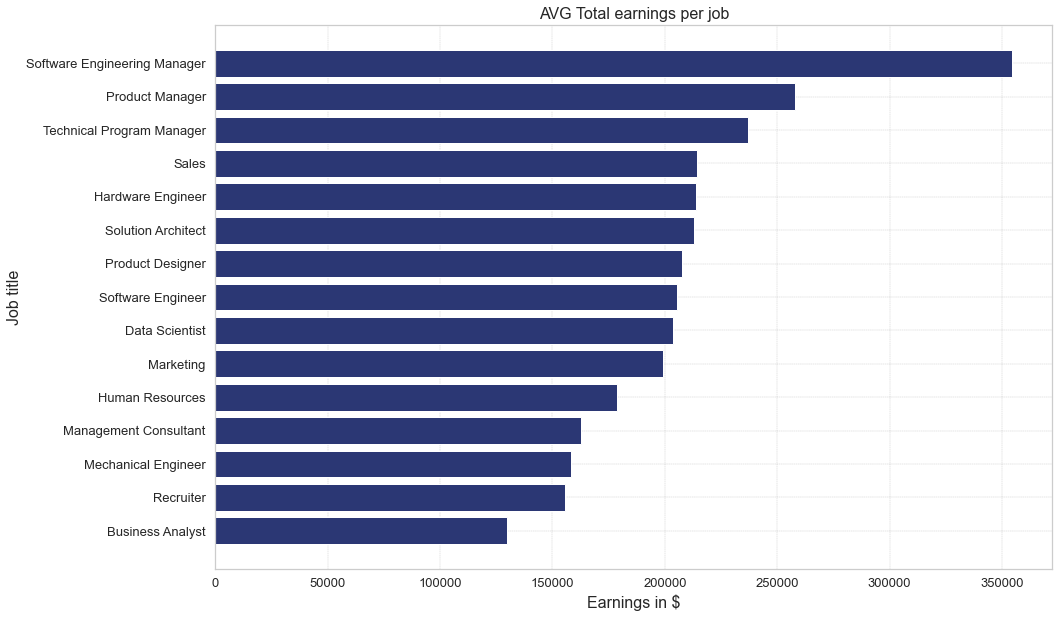

In [60]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.barh(total_income_per_job['title'], total_income_per_job['totalyearlycompensation'])
ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.2, alpha=1)
ax.invert_yaxis()
ax.set_title('AVG Total earnings per job', loc='center',fontsize=16)
plt.xlabel('Earnings in $',fontsize=16)
plt.ylabel('Job title',fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

### Maximun job count by city

In [61]:
city_job = df.groupby(['title', 'location'], as_index=False).size().sort_values('size', ascending=False)
job_distribution_in_city = city_job.groupby('title', as_index=False).apply(lambda x: x.iloc[x['size'].argmax()]).sort_values(by='size', ascending=False)

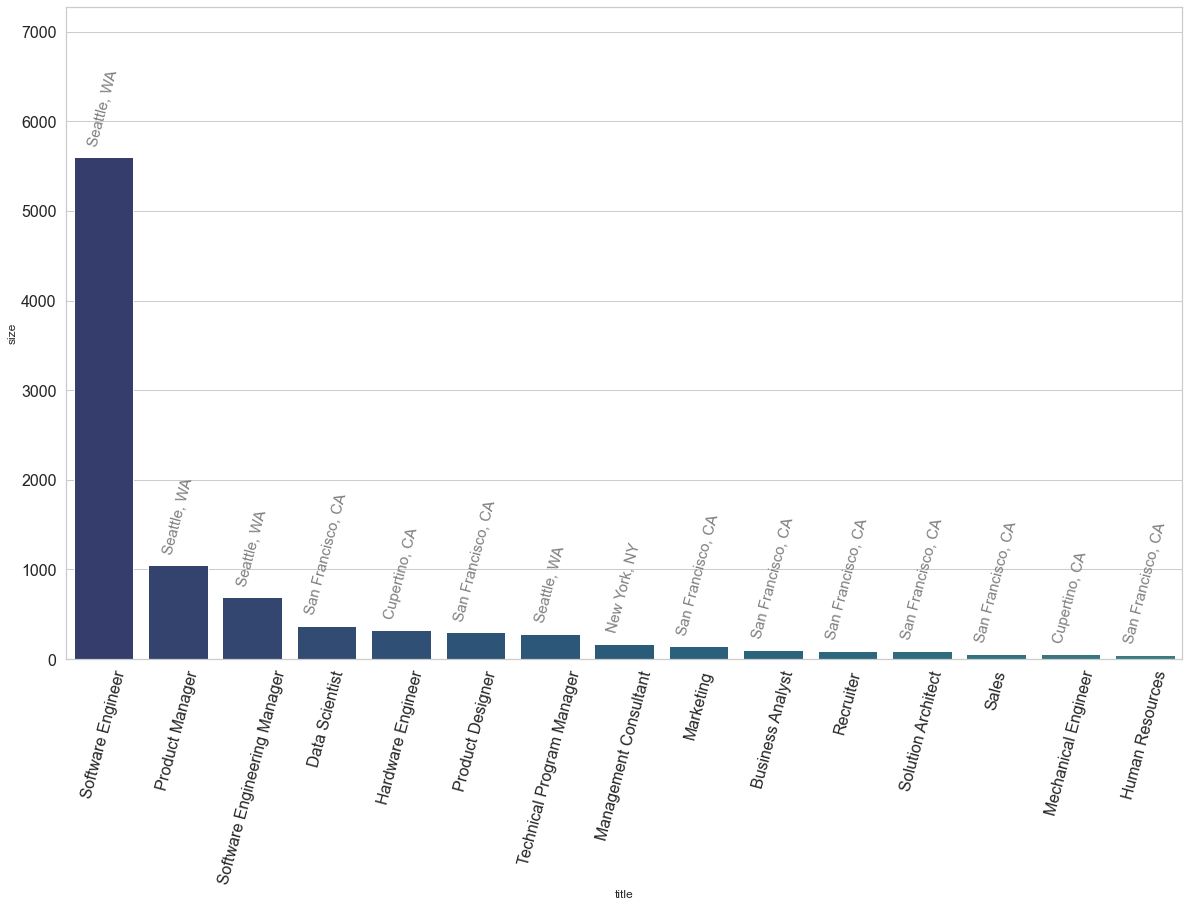

In [62]:
plt.figure(figsize=(20, 12))
splot = sns.barplot(x=job_distribution_in_city.iloc[:,0], y=job_distribution_in_city.iloc[:, 2], ci=False)
plt.xticks(rotation=75, fontsize=16)
plt.yticks(fontsize=16)
plt.margins(y=0.3)
for i in range(len(splot.patches)):
    splot.annotate(job_distribution_in_city.iloc[i, 1], 
                   (splot.patches[i].get_x() + splot.patches[i].get_width() / 2., splot.patches[i].get_height()), 
                   ha = 'center', va = 'bottom', 
                   xytext = (0, 10),
                   textcoords = 'offset points',rotation=75, fontsize=15, color='grey')

plt.show()

### Avg employee experience of each company

In [63]:
avg_exp_for_emp_by_company = df.groupby('company').agg({'title': 'count', 'yearsofexperience': 'mean'})
avg_exp_filt = avg_exp_for_emp_by_company['title'] > 100
avg_exp_for_emp_by_company = avg_exp_for_emp_by_company[avg_exp_filt].iloc[:, 1].sort_values(ascending=False)
google_avg = avg_exp_for_emp_by_company[avg_exp_for_emp_by_company.index == 'Google']
avg_exp_for_emp_by_company = avg_exp_for_emp_by_company.iloc[0:29]
avg_exp_for_emp_by_company = avg_exp_for_emp_by_company.append(google_avg)

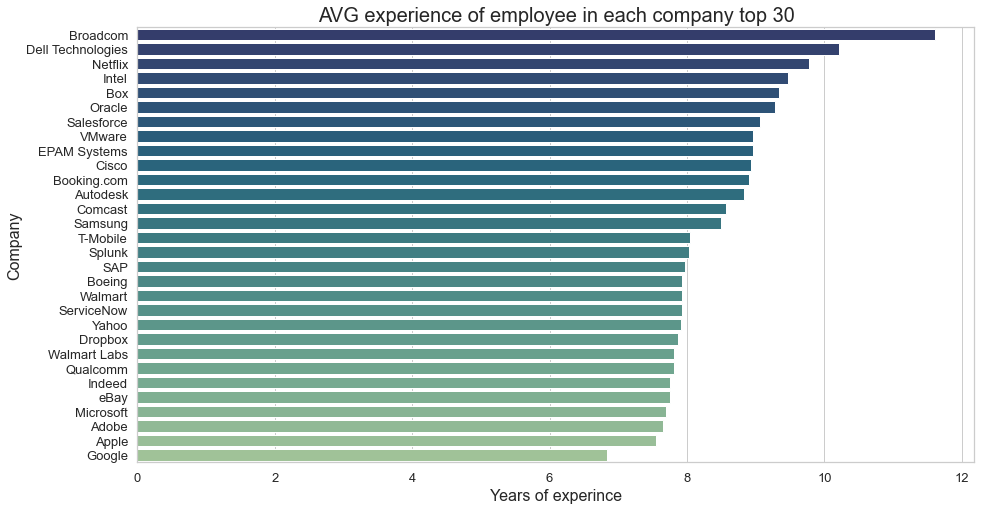

In [64]:
plt.figure(figsize=(15,8))
sns.barplot(x=avg_exp_for_emp_by_company, y=avg_exp_for_emp_by_company.index)
plt.title('AVG experience of employee in each company top 30',fontsize=20)
plt.xlabel('Years of experince',fontsize=16)
plt.ylabel('Company',fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

### Which companies pay most base salary

In [65]:
total_income_by_company = df.groupby('company', as_index=False)['basesalary'].mean().sort_values(by='basesalary', ascending=False)
wanted_companies = ['Google', 'Amazon', 'Netflix', 'Facebook']
big_company_total_income_filt = total_income_by_company['company'].isin(wanted_companies)
big_companies_total_income = total_income_by_company[big_company_total_income_filt]
big_company_total_income_filt
total_income_by_company = total_income_by_company[~big_company_total_income_filt].sort_values(by='basesalary',ascending=False).iloc[0:26].append(big_companies_total_income).sort_values(by='basesalary', ascending=False)

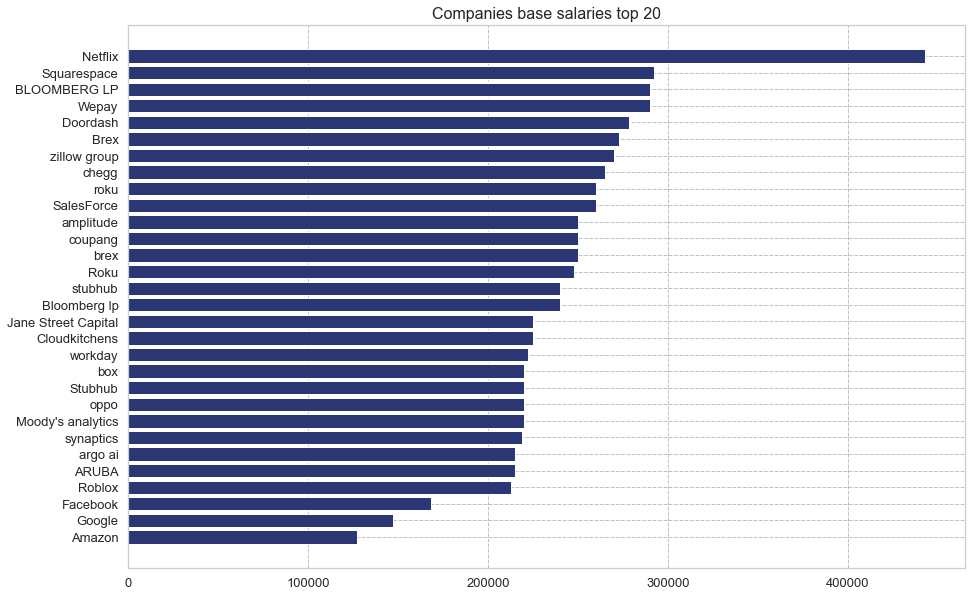

In [66]:
fig, ax = plt.subplots(figsize =(15, 10))

ax.barh(total_income_by_company.iloc[:, 0],  total_income_by_company.iloc[:, 1])
ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 1)
ax.invert_yaxis()
ax.set_title('Companies base salaries top 20', loc ='center', fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

### Each companies most paid job title

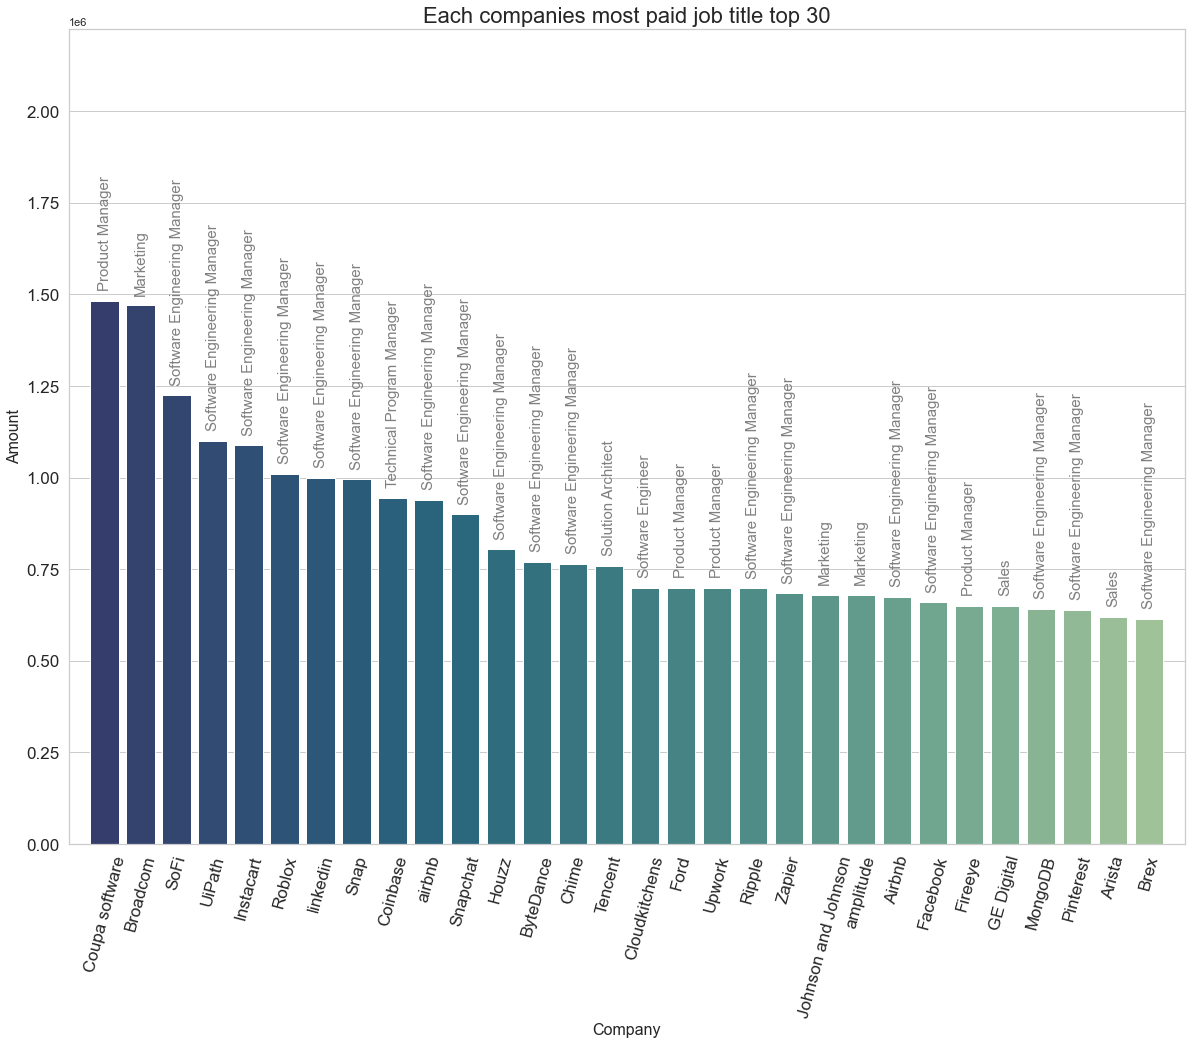

In [67]:
filt = df['totalyearlycompensation'] != 0
companies_payment_for_each_title = df[filt].groupby(['company',
                                                     'title'], as_index=False)['totalyearlycompensation'].mean()
most_paid_jobs_per_company = companies_payment_for_each_title.groupby('company',
                                                                      as_index=False).apply(lambda df: df.iloc[df['totalyearlycompensation'].argmax()]).sort_values(by='totalyearlycompensation', ascending=False)
plt.figure(figsize=(20, 15))
splot = sns.barplot(x=most_paid_jobs_per_company.iloc[0:30,0], y=most_paid_jobs_per_company.iloc[0:30, 2], ci=False)
plt.xticks(rotation=75, fontsize=16)
plt.yticks(fontsize=16)
plt.margins(y=0.3)
for i in range(len(splot.patches)):
    splot.annotate(most_paid_jobs_per_company.iloc[i, 1], 
                   (splot.patches[i].get_x() + splot.patches[i].get_width() / 2., splot.patches[i].get_height()), 
                   ha = 'center', va = 'bottom', 
                   xytext = (0, 10),
                   textcoords = 'offset points',rotation=90, fontsize=15, color='grey')
plt.title('Each companies most paid job title top 30',fontsize=22)
plt.xlabel('Company', fontsize=16)
plt.ylabel('Amount', fontsize=16)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.margins(y=0.5, x=0.02)

plt.show()